In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


loading  data into  the ipynb file and it creates data frame as shown below

In [32]:
df = pd.read_csv('Customer Churn.csv')



# FIRST STEP IS DATA CLEANING


1) check for datatype  of all data the columns entries and correct them    ex:- (object= float changes)
2) fill the date of (" ", "0') to
3) here conveting blanks as 0 as tenure is 0 and total charge is 0

In [33]:
df.info()

In [8]:
df['TotalCharges']=  df['TotalCharges'].replace(" ", "0")
df['TotalCharges'] = df['TotalCharges'].astype('float')

4)cheking for null values in data  (is sum() gives the count of nulls in each column)

In [11]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

5)applying describe() function to get the stastistical  result of data

In [3]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


6)to check if there any duplicate entries 
7)for example checked for column customerID if there any duplicate entries

In [21]:
df.duplicated().sum()
df['customerID'].duplicated().sum()

0

8)to convert data of seniorcitizens from (0,1) ==>> (no,yes) to make it understand betterly
                        
9)creating a function to convert them 

10) using  df[].apply()

In [5]:
def  conv(value):
    if (value==0):
        return 'no'
    else:
        return 'yes'

df['SeniorCitizen'] = df['SeniorCitizen'].apply(conv)
  



# Analysing Data by visualization
 
 
 11)first step in data analysis here first findout the number of costumers churned in number using countplot

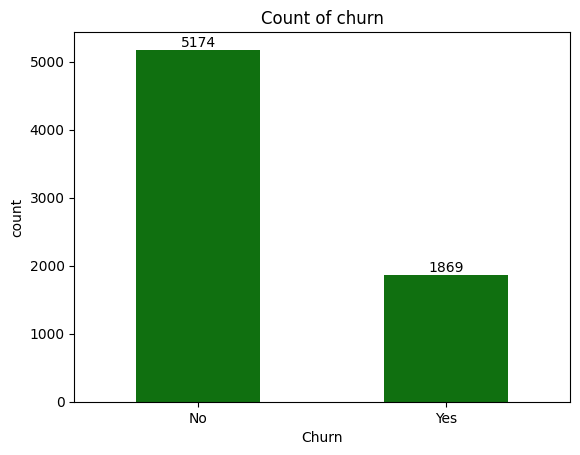

In [ ]:
val =sns.countplot(x ='Churn',color='green',data = df,width=0.5)
val.bar_label(val.containers[0])# to show the actual number on the bar
plt.title('Count of churn')
plt.show()

From the above graph no of costumer churn is = 1869 and 5174 are stills using same serivces

To show the same data in percentage we can use piechart

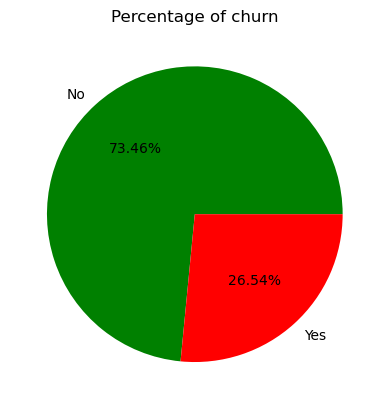

In [50]:
 gb = df.groupby('Churn').agg({'Churn':'count'})

plt.pie(gb['Churn'],autopct='%1.2f%%',labels=gb.index,colors=['green','red'])
plt.title('Percentage of churn')
plt.show()

#From the Piechart we can observe that  26.54% costumers are left the services of telecom i.e churn

#Now lets deepdive and explore the data to figure of reasons  for churn

1) categorizing basing on  Gender

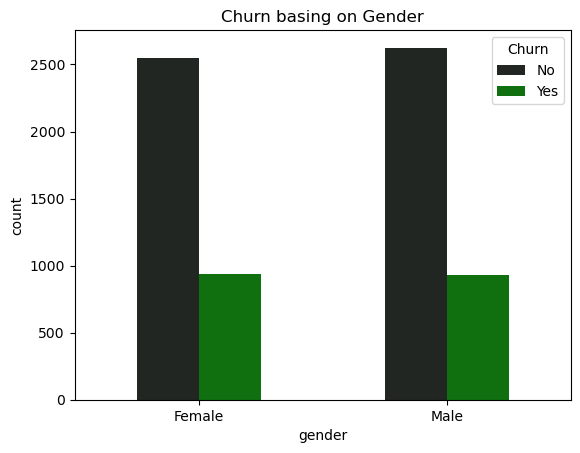

In [81]:
 sns.countplot(x ='gender', data=df,color='green',width=0.5,hue='Churn',palette='dark:green')
plt.title('Churn basing on Gender')
#l.bar_label(val.containers[0])
plt.show()                             ## 'hue' is used to compare two variables
                                       ## here wanted to know churn first  but hue used  when we want it along with the comparing the genders

##From the observation of data of churn basing on categorizing on gender we don't get any major differnce of churn 

##so cannot conclude according to gender




2)Churn  basing on no of senior citizens

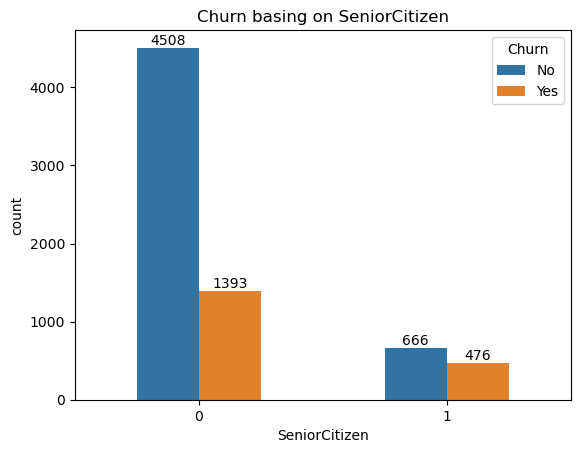

In [112]:
 l=sns.countplot(x ='SeniorCitizen', data=df,width=0.5,hue='Churn')
plt.title('Churn basing on SeniorCitizen')
l.bar_label(l.containers[0])
l.bar_label(l.containers[1])
#l.bar_label(val.containers[0])
plt.show()   

##from the above graph  we can observe that Comparatively in case of seniorcitizen out of  total seniorcitizens Maximum are  churned

3) churn based on the  Tenure

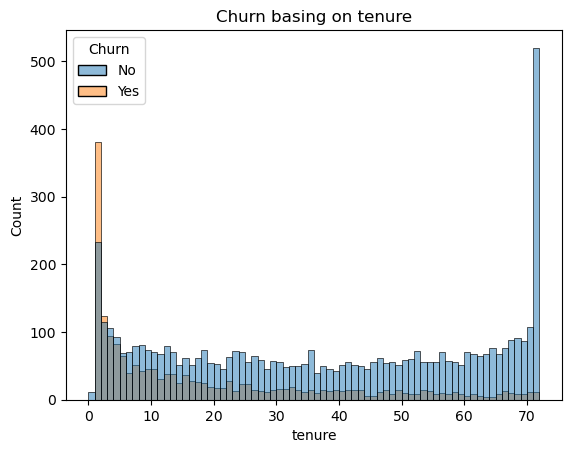

In [90]:
sns.histplot(x ='tenure', data=df,hue='Churn',bins=72)
plt.title('Churn basing on tenure')
#l.bar_label(val.containers[0])
plt.show()   

#from the above  histogram it can be observed that most of the costumers who stayed for long time or used the services are continuing but costumers who 
used the servies for short term i.e  one to two months are  churn  maximum

4) Churn based on contract

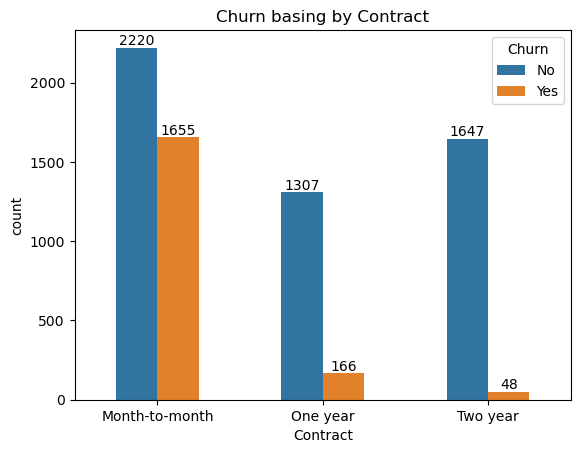

In [111]:
 l=sns.countplot(x ='Contract', data=df,width=0.5,hue='Churn')
plt.title('Churn basing by Contract')
l.bar_label(l.containers[0])
l.bar_label(l.containers[1])
plt.show()   

#from the above countplot it can be observed that most of the costumers who are  under Month-to-month contract Churn Maximum  but in case of one Year and TWo
Year contract most of costumers are not leaving the services

5. Churn based on  paperlessbilling and paymnetmethod

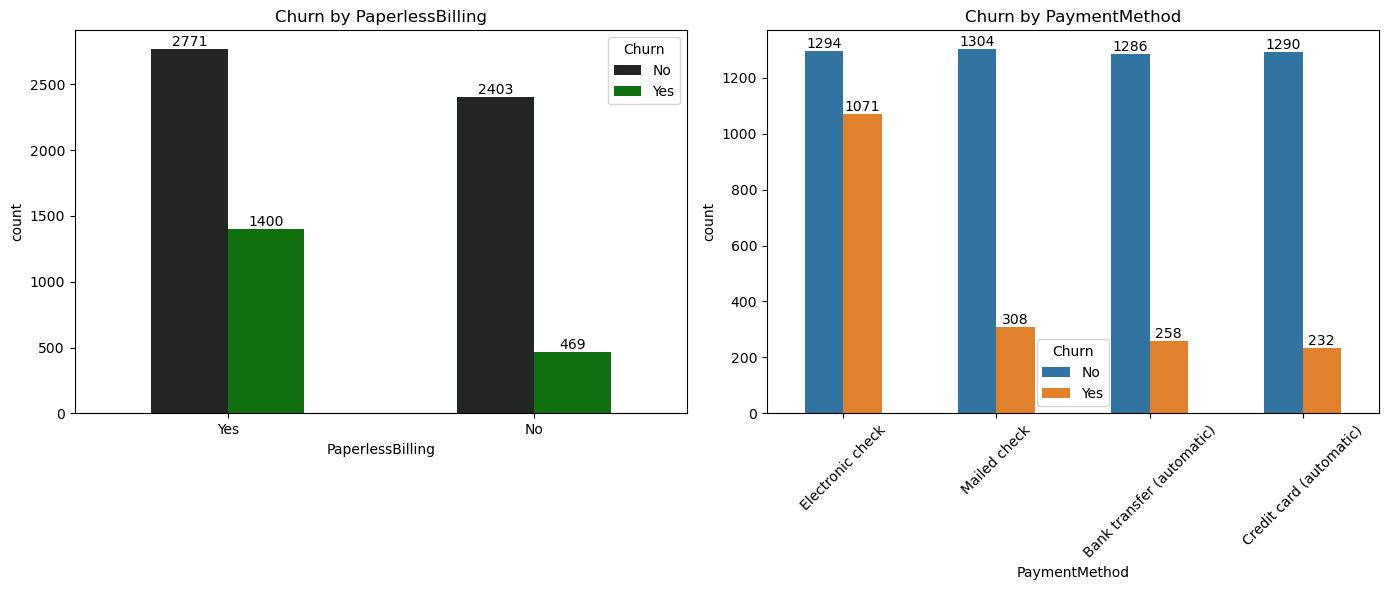

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns




fig, axes = plt.subplots(1, 2, figsize=(14, 6))

sns.countplot(ax=axes[0], x='PaperlessBilling', data=df, width=0.5, hue='Churn',palette='dark:green')
axes[0].set_title('Churn by PaperlessBilling')
for container in axes[0].containers:
    axes[0].bar_label(container)


sns.countplot(ax=axes[1], x='PaymentMethod', data=df, width=0.5, hue='Churn')
axes[1].set_title('Churn by PaymentMethod')

# Rotate x-ticks for better readability if needed
axes[1].tick_params(axis='x', rotation=45)

for container in axes[1].containers:
    axes[1].bar_label(container)

plt.tight_layout()
plt.show()


# from the above two graphs of  paperlessbilling and paymentmethod it can be observed that 

1) In case of (paperlessbilling) the costumers who use paperlessbilling churn more with compare to costumers who do not use paperlessbilling
2) In case of  (Payment method) costumers using Electronic check  churn more with compare to other.

6) Churn In case of ('PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
    'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies')


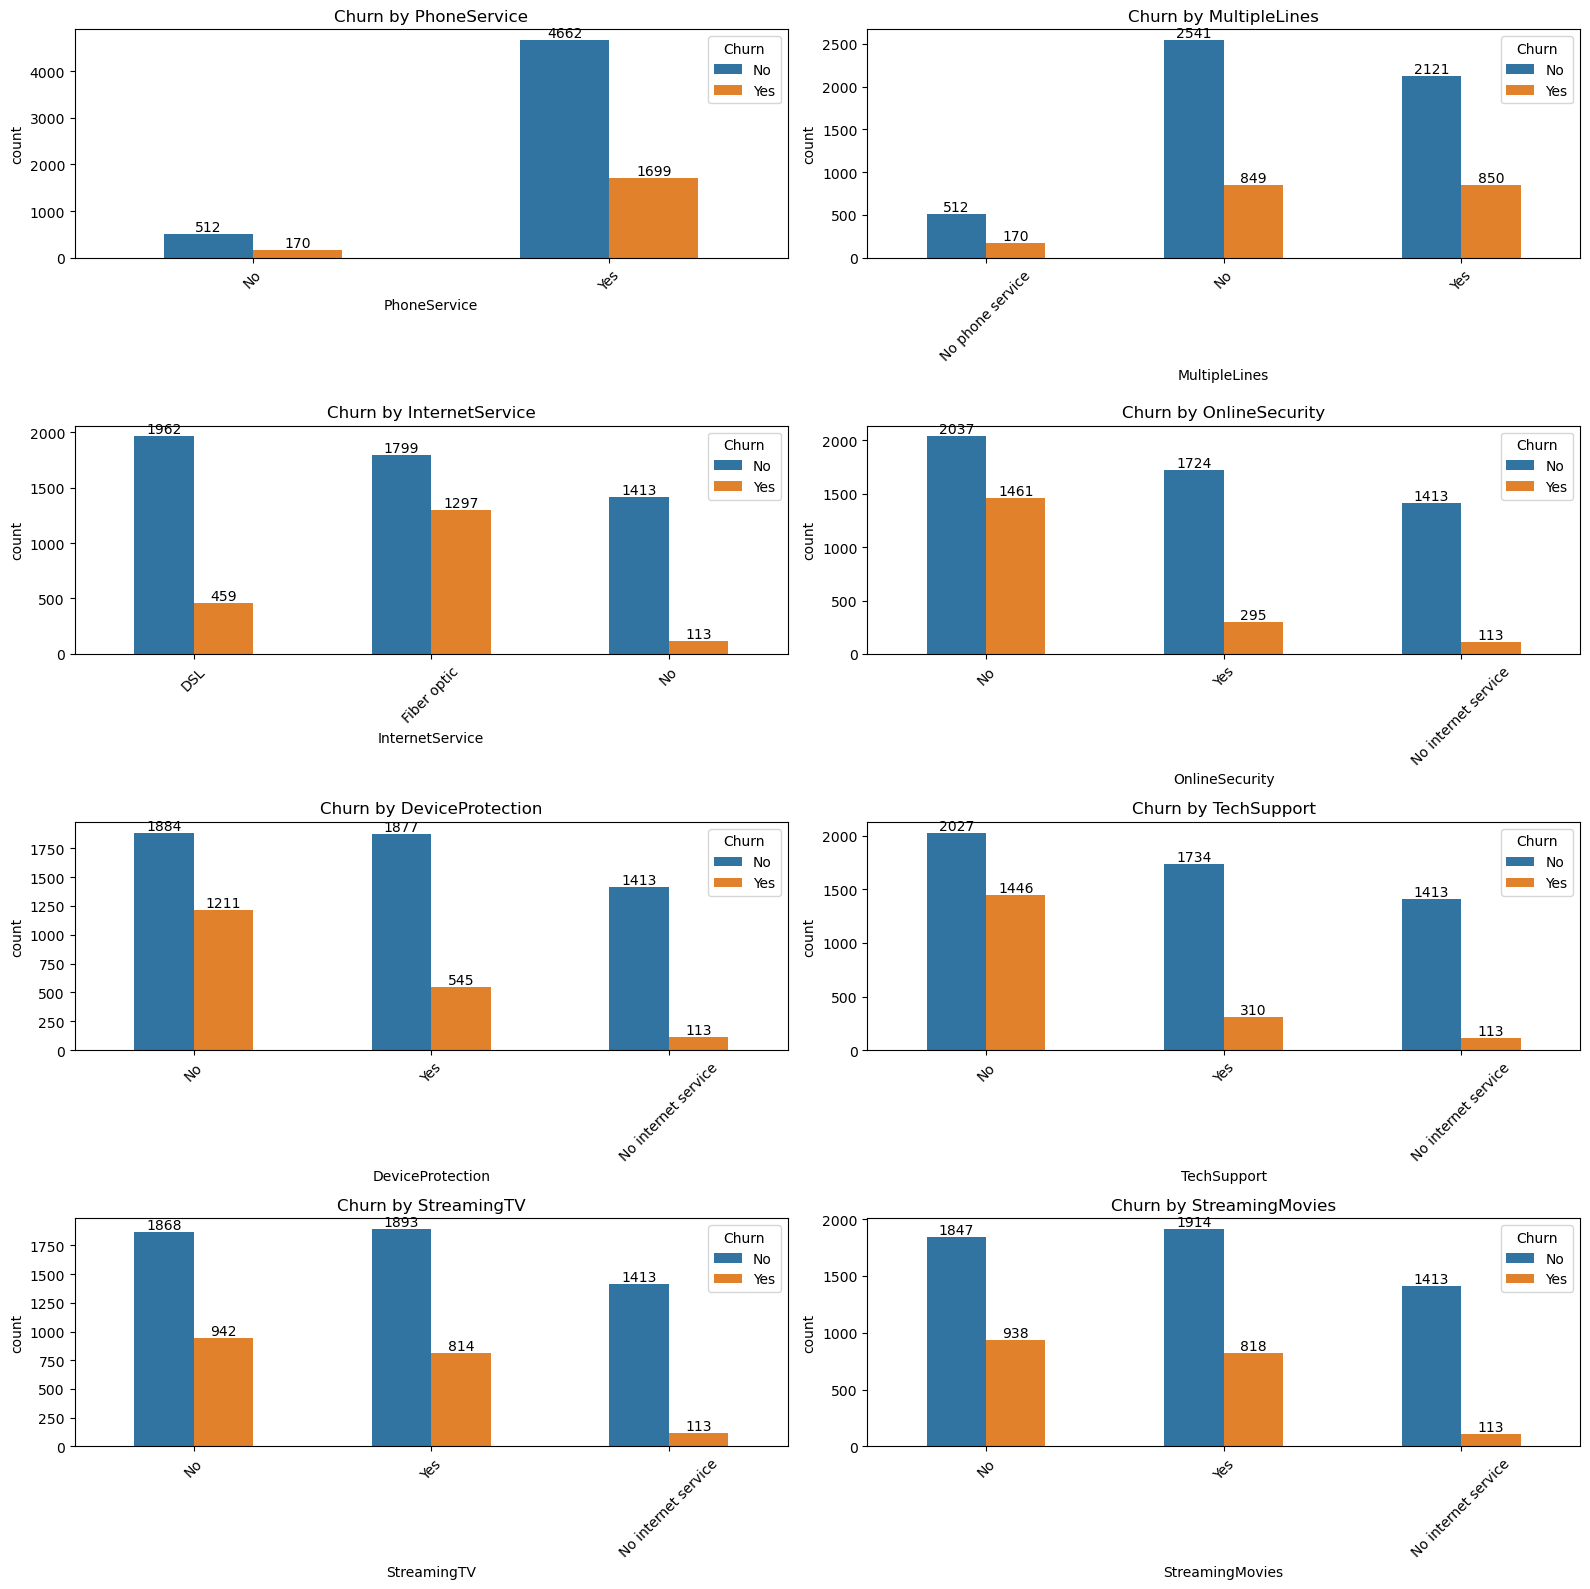

In [31]:



# List of columns to visualize
columns = [
    'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
    'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies'
]


n_cols = 2  
n_rows = (len(columns) + 1) // n_cols  


fig, axes = plt.subplots(n_rows, n_cols, figsize=(16,16)) 
axes = axes.flatten()  


for i, column in enumerate(columns):
    sns.countplot(ax=axes[i], x=column, data=df, hue='Churn', width=0.5)
    axes[i].set_title(f'Churn by {column}')
    

    axes[i].tick_params(axis='x', rotation=45)


    for container in axes[i].containers:
        axes[i].bar_label(container)


for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])


plt.tight_layout()
plt.show()


From the above Graphs it indicates that customers with services like (Fiber Optic Internet, No Online Security, and No Tech Support) show higher churn rates. Additionally, customers (without Device Protection or those not subscribed to Streaming Services) also tend to churn more frequently.